In [ ]:
Financial Analysis
Descriptive Statistics in Banking


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Matplotlib is building the font cache; this may take a moment.


In [7]:
import kagglehub
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")
print("Downloaded to:", path)

data = pd.read_csv(path+"/bank-additional-full.csv",sep=";")

df=pd.DataFrame(data)

Downloaded to: /Users/fitsum/.cache/kagglehub/datasets/henriqueyamahata/bank-marketing/versions/1


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

print("Mean age:", mean_age)
print("Median age:", median_age)
print("Mode age:", mode_age)

Mean age: 40.02406040594348
Median age: 38.0
Mode age: 31


In [11]:
# Calculating dispersion measures
variance_age = df['age'].var()
std_dev_age = df['age'].std()
iqr_age = df['age'].quantile(0.75) - df['age'].quantile(0.25)
print(f"Variance: {variance_age}, Standard Deviation: {std_dev_age},IQR: {iqr_age}")

Variance: 108.60245116511788, Standard Deviation: 10.421249980934048,IQR: 15.0


In [12]:
# Calculating skewness and kurtosis
skewness_age = df['age'].skew()
kurtosis_age = df['age'].kurtosis()
print(f"Skewness: {skewness_age}, Kurtosis: {kurtosis_age}")

Skewness: 0.7846968157646645, Kurtosis: 0.7913115311544336


/var/folders/jp/3b86t7dx6djcsygbs07yz0v00000gn/T/ipykernel_49919/351395644.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


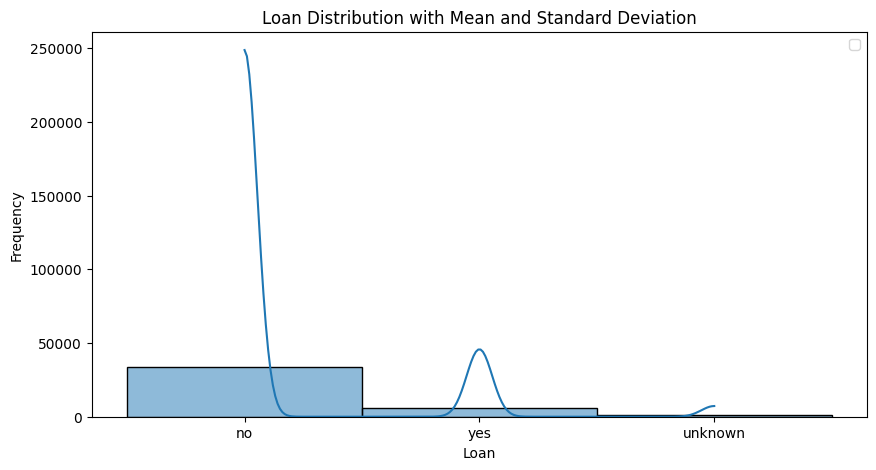

In [17]:
# Visualizing risk assessment with standard deviation
plt.figure(figsize=(10, 5))
sns.histplot(df['loan'], bins=2, kde=True)
#plt.axvline(x=df['loan'].mean(), color='red', linestyle='--',label='Loan')
#plt.axvline(x=df['loan'].mean() + df['loan'].std(),color='green', linestyle='--', label='1 Std Dev')
#plt.axvline(x=df['loan'].mean() - df['loan'].std(),color='green', linestyle='--')
plt.title("Loan Distribution with Mean and Standard Deviation")
plt.xlabel("Loan")
plt.ylabel("Frequency")
plt.legend()
plt.show()

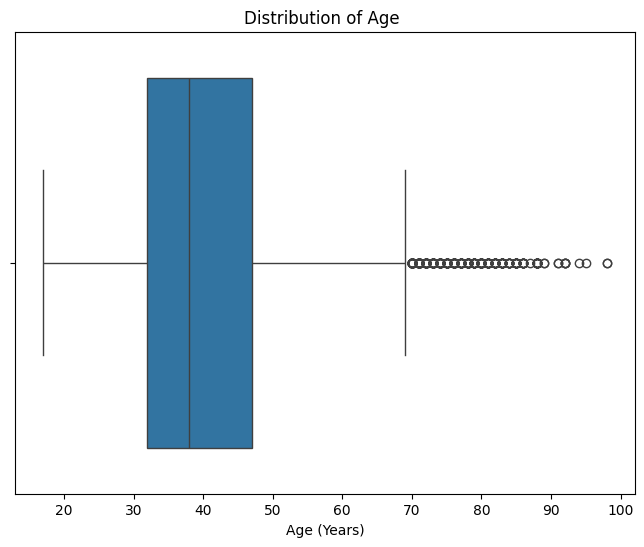

In [19]:
# Box Plot for Call Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title("Distribution of Age ")
plt.xlabel("Age (Years)")
plt.show()

In [29]:
# Calculating correlations
pearson_corr = df[['age', 'campaign','pdays']].corr(method='pearson')
spearman_corr = df[['duration', 'campaign']].corr(method='spearman')
print(f"Pearson Correlation: \n{pearson_corr}, \nSpearman Correlation:\n{spearman_corr}")

Pearson Correlation: 
               age  campaign     pdays
age       1.000000  0.004594 -0.034369
campaign  0.004594  1.000000  0.052584
pdays    -0.034369  0.052584  1.000000, 
Spearman Correlation:
          duration  campaign
duration  1.000000 -0.080953
campaign -0.080953  1.000000


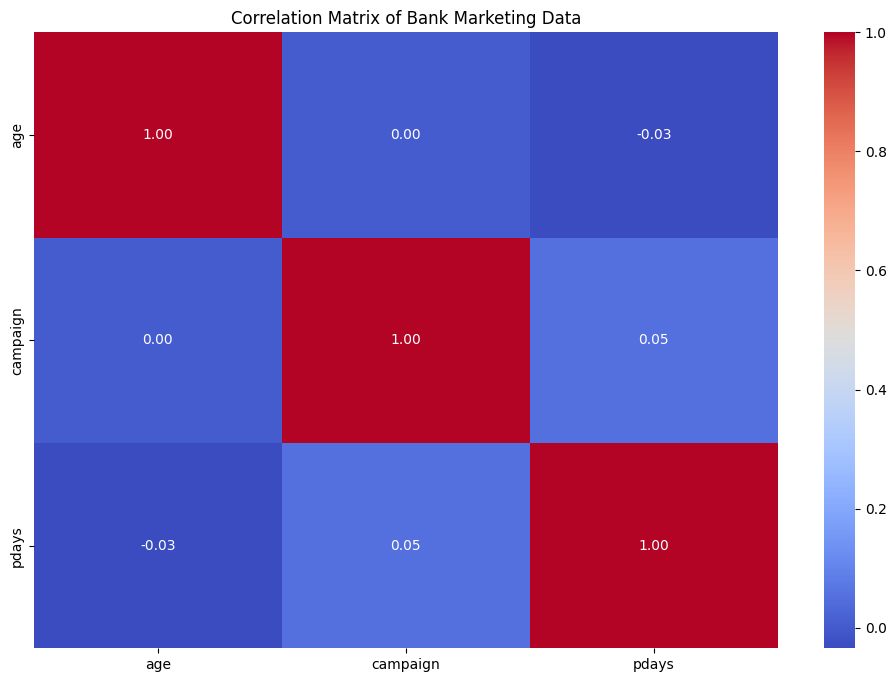

In [30]:
plt.figure(figsize=(12, 8))
#correlation_matrix = df.corr()
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm',
fmt=".2f")
plt.title("Correlation Matrix of Bank Marketing Data")
plt.show()

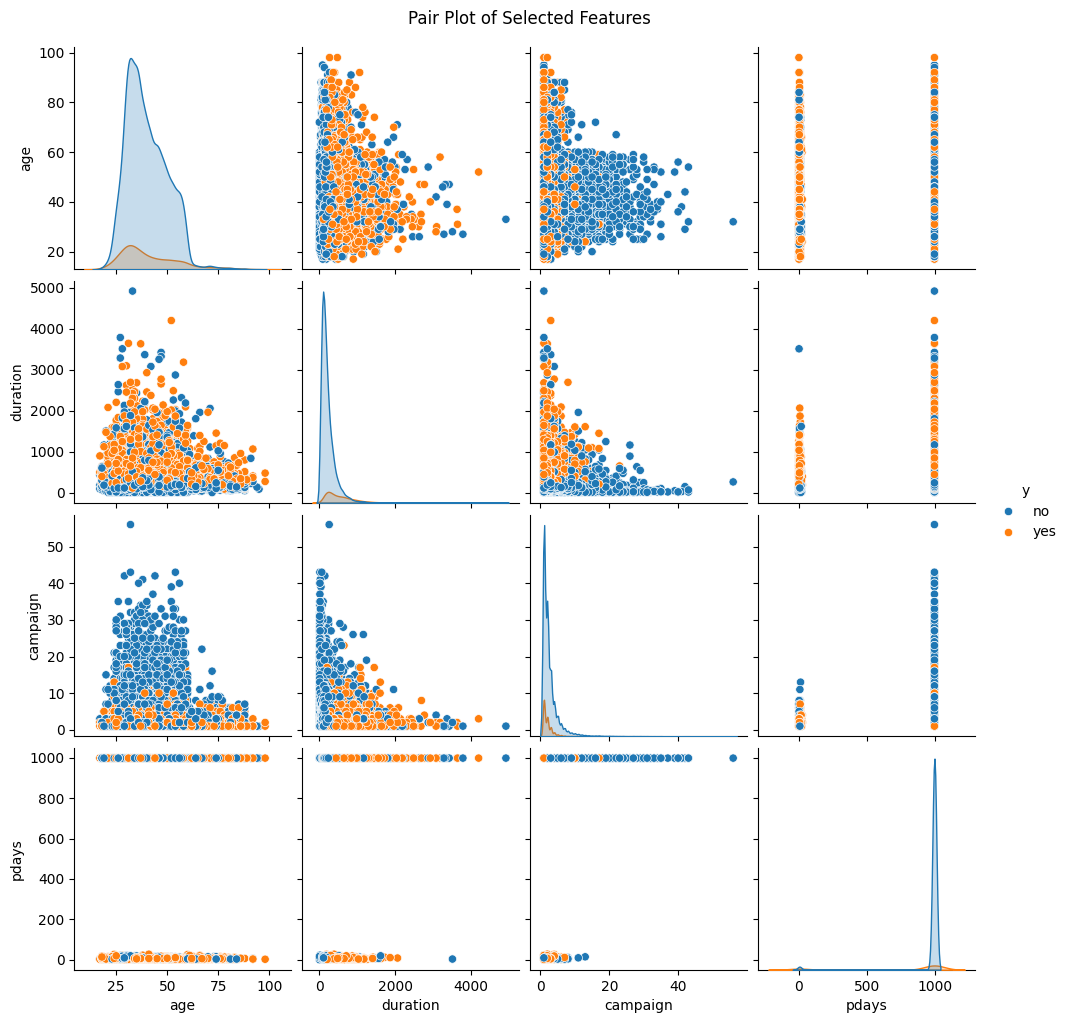

In [25]:
sns.pairplot(df, vars=['age', 'duration', 'campaign', 'pdays'],hue='y')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

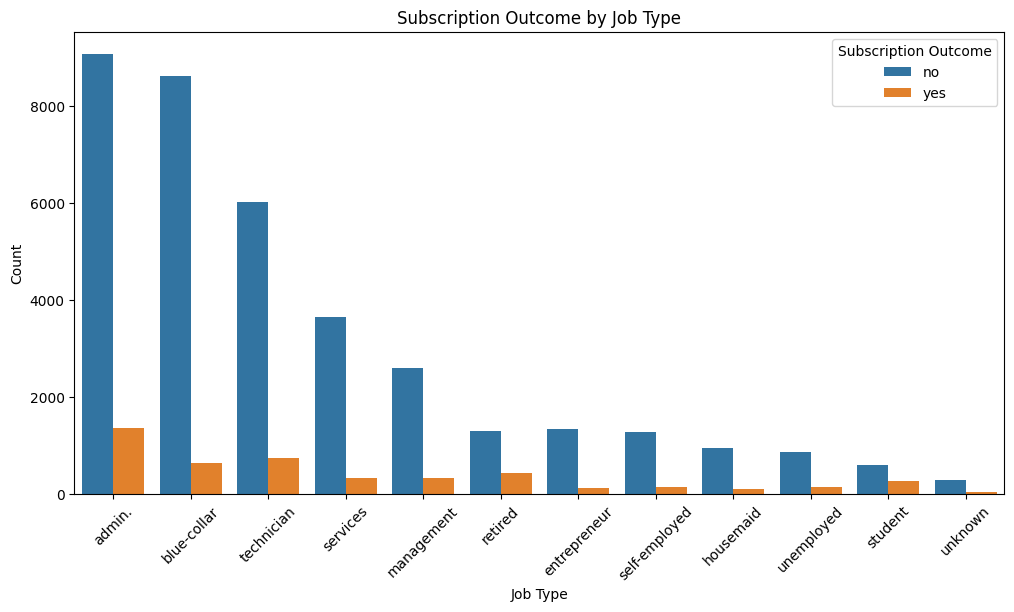

In [26]:
# Customized count plot for subscription outcome by job type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y',
order=df['job'].value_counts().index)
plt.title("Subscription Outcome by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscription Outcome")
plt.show()

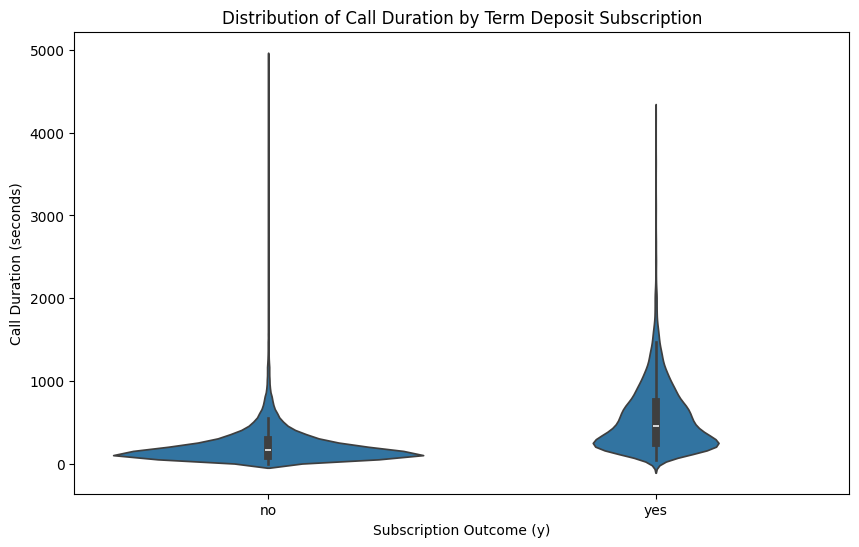

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=df)
plt.title("Distribution of Call Duration by Term Deposit Subscription")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Call Duration (seconds)")
plt.show()

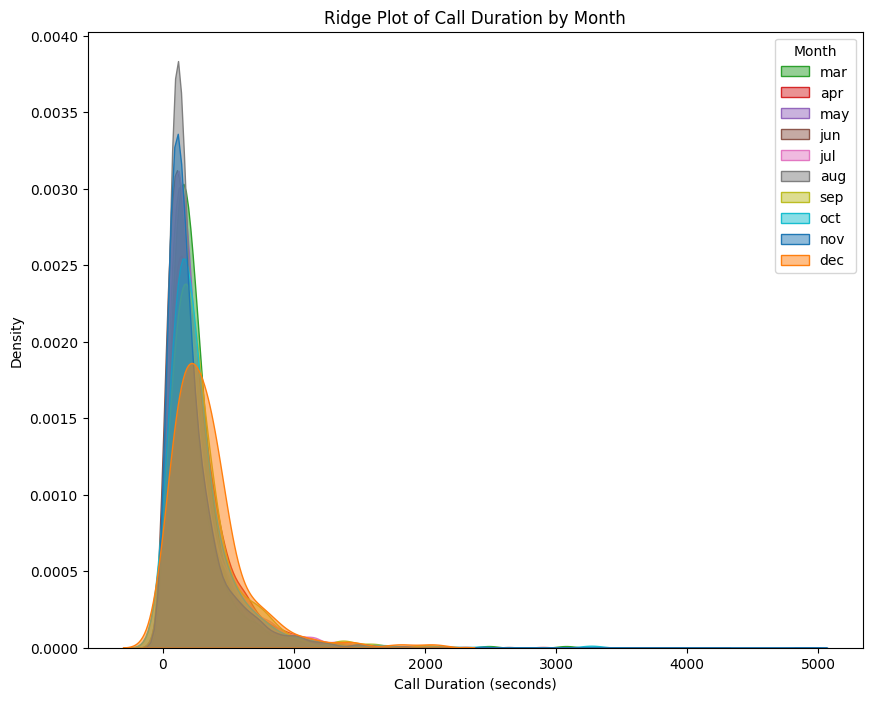

In [28]:
import numpy as np
# Sort by month order for better visual alignment
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order,
ordered=True)
df_sorted = df.sort_values('month')
# Plotting Ridge Plot
plt.figure(figsize=(10, 8))
for month in month_order:
    sns.kdeplot(df_sorted[df_sorted['month'] == month]['duration'],
label=month, fill=True, alpha=0.5)
plt.title("Ridge Plot of Call Duration by Month")
plt.xlabel("Call Duration (seconds)")
plt.ylabel("Density")
plt.legend(title='Month')
plt.show()